# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diamonds = pd.read_csv('diamonds_clean.csv')
diamonds = diamonds.drop('Unnamed: 0', axis=1)

Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [3]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53933.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.732007,5.734158,3.539707
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.119670,1.113268,0.692075
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,19.278421,8.060000


In [ ]:
#your comments here
#There seem to be many influences on the price, prices vary very much. Carat also has a high variablility. 
#Color and Clarity were categorical columns that were turned into a numeric scale, they also a high variability

Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here
#Carat is the known measurment for diamonds, so I would guess that has the highest impact.

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [6]:
#your code here
diamonds.groupby("color").agg({'carat':'mean', 'clarity':'mean', 'depth':'mean', 
                               'table':'mean', 'price':'mean', 'x':'mean', 'y':'mean', 'z':'mean'})

,carat,clarity,depth,table,price,x,y,z
color,,,,,,,,
0,1.162137,2.776353,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251
1,1.026927,2.964035,61.846385,57.577278,5091.874954,6.222826,6.222730,3.846369
2,0.911799,2.933646,61.836850,57.517811,4486.669196,5.984776,5.981484,3.699147
3,0.771190,3.463425,61.757111,57.288629,3999.135671,5.678549,5.681198,3.507966
4,0.736538,3.133934,61.694582,57.433536,3724.886397,5.616727,5.620634,3.465788
5,0.657867,2.969889,61.662090,57.491201,3076.752475,5.411580,5.416949,3.337767
6,0.657795,2.691513,61.698125,57.404590,3169.954096,5.417851,5.421928,3.343320


**What do you see? Pay special attention to the relationship between price and color.**

In [7]:
#your thoughts here
#On the color-scale, higher is better. Interestingly, the average price is higher for the lower color values, not the highest.
#So price does not seem to be as strongly influenced by color as by other factors.

Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

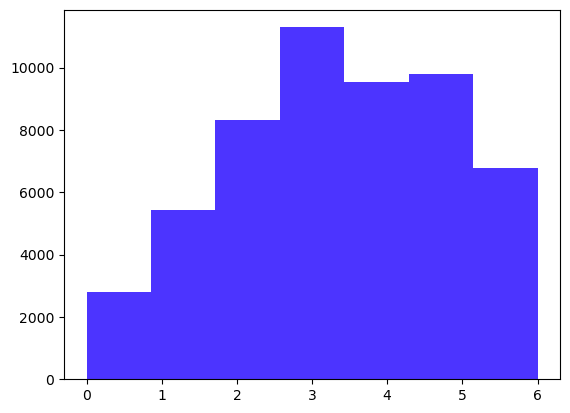

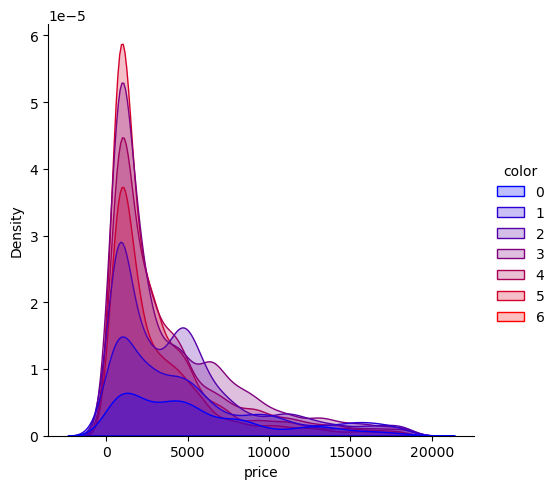

In [39]:
#your code here
#plotting distribution, 1 value
plt.hist(diamonds["color"], bins = 7)
#sns.displot(diamonds["color"], discrete=True)

#plotting distribution, 2 values
sns.displot(diamonds[["color","price"]], x="price", hue="color", kind="kde", fill=True, palette="blend:#00F,#F00")
plt.show()

In [ ]:
#your comments here
#looking at the distribution of color alone in the data, it is very evenly spread out. 
#Only 0, the best color, appears noticably less often.
#Mapping all the color counts against price, all color-distributions have about the same shape, a better color closer to 0
# does not show a noticable peak in the counts of high prices.
# To conclude, color is not the most important factor for price.

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [57]:
#your code here
caratbins = pd.cut(diamonds['carat'], 10)
diamonds["caratbins"] = caratbins
carat_means = diamonds.groupby("caratbins").agg({'color':'mean', 'clarity':'mean', 'depth':'mean', 
                               'table':'mean', 'price':'mean', 'x':'mean', 'y':'mean', 'z':'mean'}).reset_index()
carat_means

,caratbins,color,clarity,depth,table,price,x,y,z
0,"(0.195, 0.681]",3.788949,3.676168,61.679288,56.987494,1068.976029,4.717949,4.727016,2.912060
1,"(0.681, 1.162]",3.428219,2.553098,61.835338,57.822898,4321.345700,6.185665,6.186228,3.823945
2,"(1.162, 1.643]",2.604994,2.640062,61.747510,57.849979,8710.828868,7.126633,7.117059,4.395920
3,"(1.643, 2.124]",2.114517,2.016603,61.796509,58.206939,13758.395913,7.955309,7.941247,4.911484
4,"(2.124, 2.605]",1.469055,1.547231,61.759935,58.057329,15241.128664,8.451419,8.423719,5.209529
5,"(2.605, 3.086]",1.622642,0.622642,62.296226,58.811321,14521.264151,9.033208,8.963774,5.603250
6,"(3.086, 3.567]",1.833333,0.500000,63.783333,56.333333,13653.333333,9.468333,9.400000,6.013333
7,"(3.567, 4.048]",1.000000,0.000000,63.260000,58.000000,14858.200000,9.912000,9.854000,6.246000
8,"(4.048, 4.529]",1.000000,0.000000,65.300000,59.500000,17930.000000,10.115000,10.005000,6.575000
9,"(4.529, 5.01]",0.000000,0.000000,65.500000,59.000000,18018.000000,10.740000,10.540000,6.980000


In [ ]:
#your comments
#Grouping by carat had too many rows to read the result easily, so I first grouped carat into 10 same-size bins.
# There seems to be a strong dependency on carat. Higher carat comes with higher prices.
# Better Clarity and better color seem to occur with less carat more, maybe pointing to a negative correlation. 
# It is easier to find a small diamond with no flaws than a big one.
# Depth and table do not show such a big variablility in average values to carat. 
# As could be expected, more carat, more weight comes with bigger dimensions in x, y and z.


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

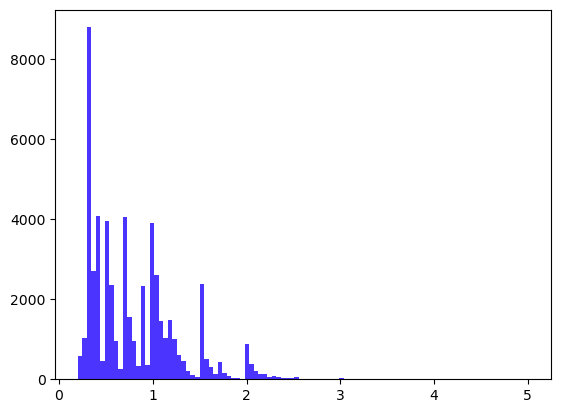

C:\Users\mycro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


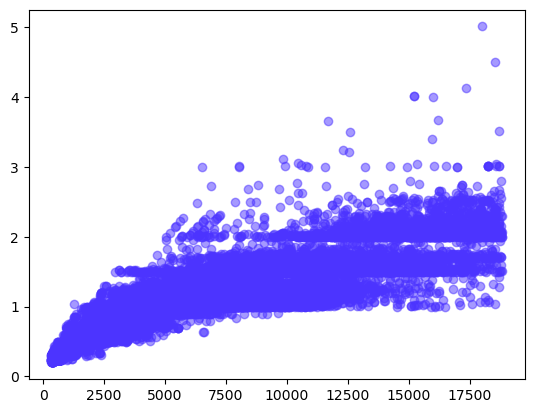

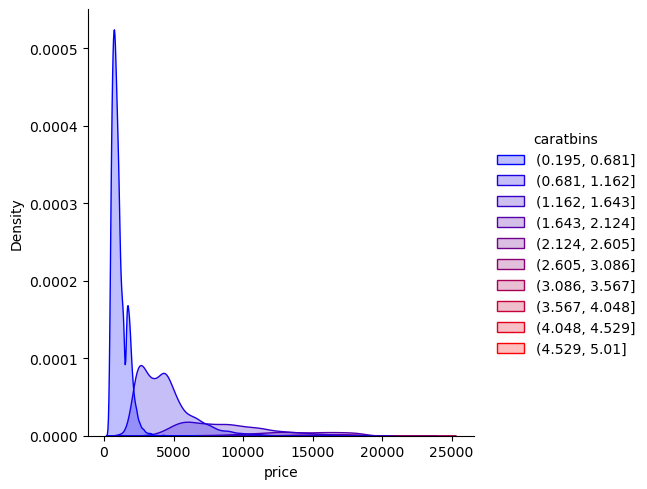

In [68]:
#your code here
plt.hist(diamonds["carat"], bins = 100)
plt.show()

#scatterplot price vs carat
plt.scatter(diamonds["price"], diamonds["carat"], alpha=0.5)

#plotting distribution, 2 values
sns.displot(diamonds[["caratbins","price"]], x="price", hue="caratbins", kind="kde", fill=True, palette="blend:#00F,#F00")

plt.show()

#The diamonds data is about refined diamonds rather than raw diamonds. 
# This means the distribution shows peaks at values like 1, 1.5 and 2, as diamonds of these weights seem to be produced more often.

# Otherwise, the distribution is as expected, peaking at lower carat values and flattening out to the higher end.
#Mapping the distribution of the carat-values grouped into 10 bins, that gets more noticable: 
# Only the carat bins in blue are really visible, which hold the smaller carat sizes. 
# There is not enough stones with higher carat values to make the other bins show in the same diagram.

#Looking at the scatterplot of carat and price, a positive correlation can be expected, 
# though there is quite a variability visible, so other factors weigh in too.

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [52]:
#your code here
tablebins = pd.cut(diamonds['table'], 10)
diamonds["tablebins"] = tablebins
diamonds.groupby("tablebins").agg({'carat':'mean', 'clarity':'mean', 'depth':'mean', 
                               'color':'mean', 'price':'mean', 'x':'mean', 'y':'mean', 'z':'mean'})

,carat,clarity,depth,color,price,x,y,z
tablebins,,,,,,,,
"(42.948, 48.2]",0.665000,4.000000,62.850000,3.000000,2735.500000,5.325000,5.325000,3.345000
"(48.2, 53.4]",0.703139,3.442451,62.469208,3.301943,3347.635277,5.471482,5.483189,3.424860
"(53.4, 58.6]",0.753735,3.182908,61.970795,3.439532,3664.579296,5.621990,5.628317,3.486175
"(58.6, 63.8]",0.906173,2.726984,61.239852,3.328729,4612.871852,5.999189,5.992683,3.672103
"(63.8, 69.0]",0.947360,2.517483,59.849301,3.351399,4254.547203,6.186830,6.135919,3.684746
"(69.0, 74.2]",0.738571,2.785714,61.228571,3.428571,2848.214286,5.905000,5.807143,3.564286
"(74.2, 79.4]",0.800000,1.500000,67.050000,3.500000,2331.500000,5.390000,5.165000,3.465000
"(79.4, 84.6]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(84.6, 89.8]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#your comments here
#looking at table, there is clearly one single value far removed from the rest, with table = 95. 
# As table is the greatest width of a diamond, it comes with higher values in x, y and z.
# This value also shows quite a high price.
#After grouping table into 10 tablebins, the rest of the data is easier to interpret.
#Grouped by table, the highest average price and also carat show up in the middle of the data, around table-sizes between 58-69.
#However, there seems to be no clear peak, values are spread out quite equally. 
# Thus table does not seem to be the main variable affecting price.

**Finally, do the same with the `clarity` column.**

In [53]:
#your code here
diamonds.groupby("clarity").agg({'carat':'mean', 'table':'mean', 'depth':'mean', 
                               'color':'mean', 'price':'mean', 'x':'mean', 'y':'mean', 'z':'mean'})

,carat,table,depth,color,price,x,y,z
clarity,,,,,,,,
0,1.283846,58.303779,62.734278,2.968961,3924.168691,6.761093,6.709379,4.224688
1,1.077648,57.927181,61.772167,3.469980,5063.028606,6.404157,6.395603,3.952434
2,0.850482,57.662541,61.853042,3.448450,3996.001148,5.888383,5.888256,3.640636
3,0.763935,57.417401,61.724417,3.494208,3924.989395,5.658633,5.659782,3.492788
4,0.727158,57.315151,61.667458,3.161792,3839.455391,5.572860,5.580017,3.437925
5,0.596202,57.024990,61.663778,3.569483,3283.737071,5.218454,5.232118,3.221465
6,0.503321,56.884460,61.624651,3.351573,2523.114637,4.961721,4.976437,3.062132
7,0.505123,56.507207,61.510615,3.101676,2864.839106,4.968402,4.989827,3.061659


In [ ]:
#your comments here
#Grouped by clarity, as similar result shows as with table: The prices are quite evenly spread out 
# and show a similar mean for any clarity, as are all the other variables.
# The only price-peak is at clarity = 1, so at a not so good clarity. Thus, clarity is not the main variable affecting price.

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here
#Carat had the strongest effect on price, as was expected. Color also played a role. Clarity and table not so much.
#This matches my hypothesis of carat being important, but the analysis showed it definitely is not the only factor to decide price. 

# 4. Taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


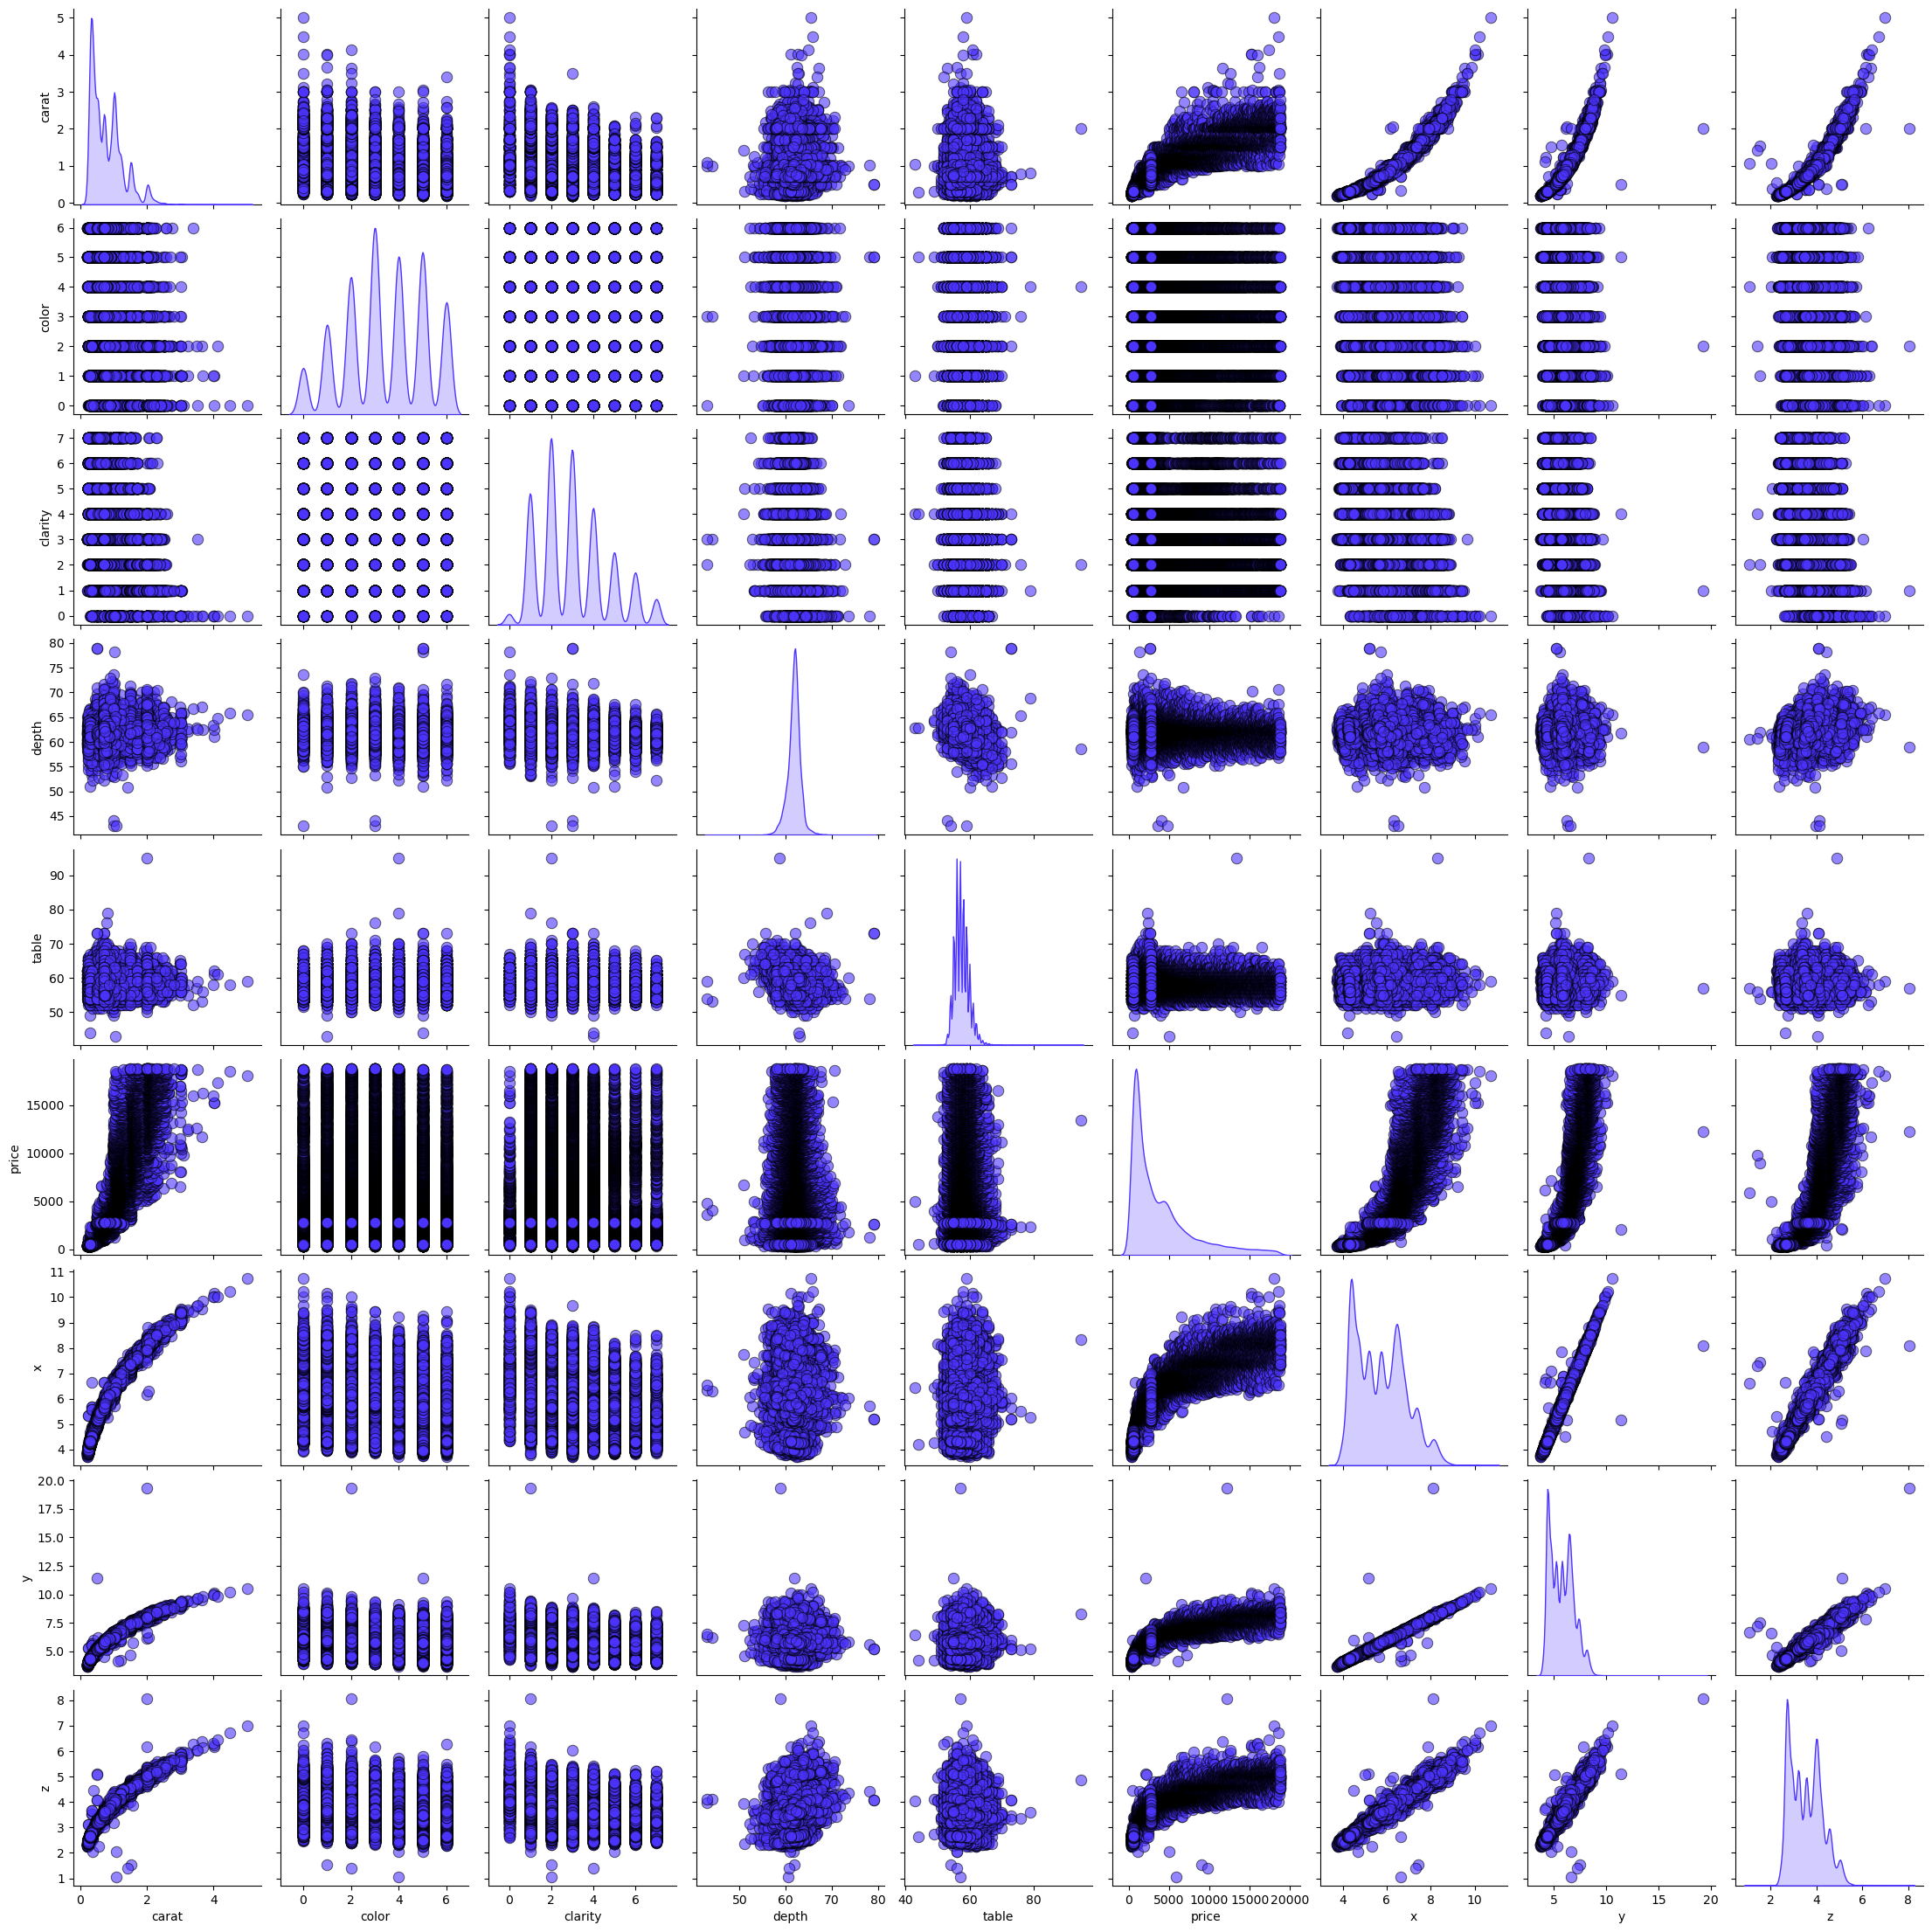

In [71]:
#Run this code
#import seaborn as sns
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show()

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here
#The graphs show that the dimensional variables, x, y, z and carat are closely linked and very correlated, as could be expected.
# Every one of these variables schows a similar correlation to price.
# Interestingly, the other dimensional variables depth percentage and table do not show the same correlations.
# Categorical variables clarity and color are harder to interpret. There is no clear definite trends showing for those, 
# just weak trends like greater deapth == less clarity, however these variables still might play a role, but might require 
# some sort of partitioning of the data first to make it visible.

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

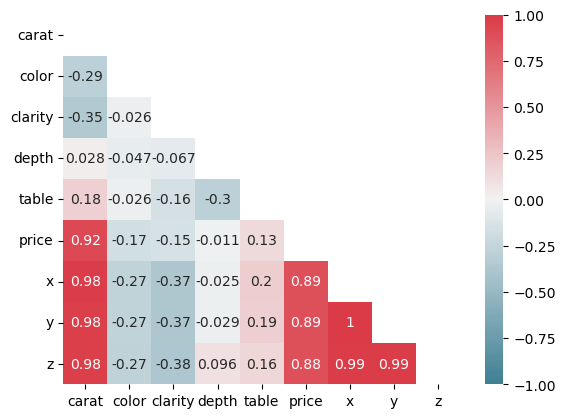

In [77]:
# your code here
corr = diamonds.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1)
plt.show()

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here
#Yes, The strong correlations are all between price and carat, x, y, z. 
# The dimensions x, y, z also are strongly correlated with each other.
# Also visible now are the weaker negative correlations between carat (and the other dimensions) and color and clarity. 

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

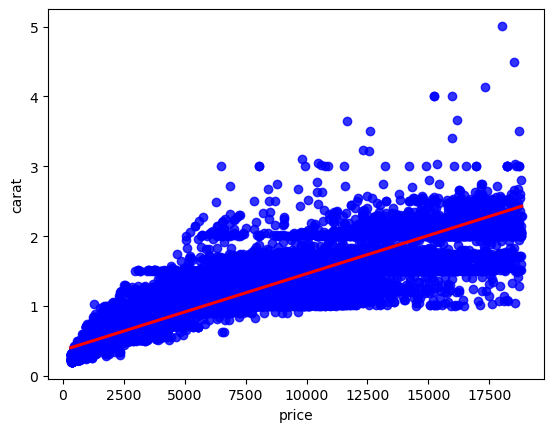

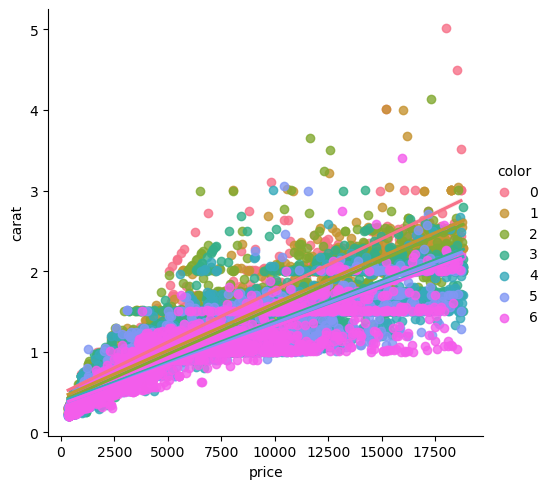

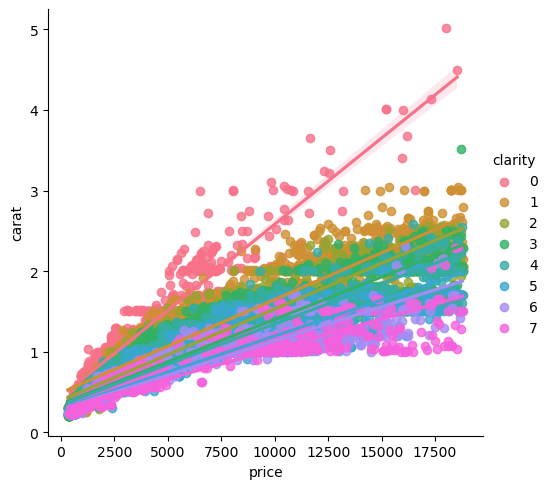

In [96]:
# your code here
#linear regression
sns.regplot(x="price", y="carat", data=diamonds, scatter_kws={"color": "#00F"}, line_kws={"color": "#F00"});

#linear regressions, grouped by color 
# -> showing: the better the color, the more expensive the diamond even with lower carat.
sns.lmplot(x="price", y="carat", hue="color", data=diamonds);

#linear regressions, grouped by clarity 
# -> showing: the better the clarity, the more expensive the diamond even with lower carat.
# -> showing: for diamonds with low clarity, carat and price have a clearer correlation.
sns.lmplot(x="price", y="carat", hue="clarity", data=diamonds);

plt.show()

In [97]:
from scipy import stats
res = stats.linregress(diamonds["price"], diamonds["carat"])
res
#Regression line: y = res.intercept + res.slope * x
#Regression line: y = 0.36729720416334355 + 0.00010950024770016965 * x
#Standard error of the estimated slope: 1.985829466853501 *e-07
#Standard error of the estimated intercept: 0.0011124589026090665

LinregressResult(slope=0.00010950024770016965, intercept=0.36729720416334355, rvalue=0.9215913011934762, pvalue=0.0, stderr=1.985829466853501e-07, intercept_stderr=0.0011124589026090665)

**What do you think?**

In [ ]:
#your thoughts here
# The regression line does show the possitive correlation, however, a curve would problably fit the data better than a straight line.
# Also, mapping the factors color and clarity showed that dividing the data up into groups might also give better regression results.

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here
#I would try to do more analysis including carat and price and clarity/color.

**Conclusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.